# -------------------
## 📋 PreML Checklist Analysis
# 1️⃣ Data Overview
# -------------------

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "github_users_with_location.csv"  # Replace with your dataset path
df = pd.read_csv(file_path)



In [50]:
print("Dataset Overview:")
display(df.head())
print("\nColumns and Data Types:")
display(df.info())
print("\nStatistical Summary:")
display(df.describe())

Dataset Overview:


,Username,Name,Bio,Public_Repos,Followers,Following,Repositories,Languages,Location,Latitude,Longitude,Profile_URL
0,mojombo,Tom Preston-Werner,NaN,66,24135,11,"30daysoflaptops.github.io, asteroids, benbalte...","CSS, JavaScript, C, Ruby, Scheme, TypeScript, ...",San Francisco,37.779259,-122.419329,https://github.com/mojombo
1,defunkt,Chris Wanstrath,🍔,107,22438,215,"ace, acts_as_textiled, ambition, ambitious_act...","JavaScript, Ruby, CoffeeScript, HTML, Emacs Li...",NaN,NaN,NaN,https://github.com/defunkt
2,pjhyett,PJ Hyett,NaN,8,8322,30,"auto_migrations, blackjax, errcount, git-serve...","JavaScript, Ruby",NaN,NaN,NaN,https://github.com/pjhyett
3,wycats,Yehuda Katz,NaN,299,10271,13,"2025-heroku-plans, abbot-from-scratch, abbot-n...","JavaScript, Rust, CSS, Ruby, CoffeeScript, She...","Portland, OR",45.520247,-122.674194,https://github.com/wycats
4,ezmobius,Ezra Zygmuntowicz,NaN,22,572,13,"acl_system2, bmhsearch, chef-101, chef-deploy,...","Perl, C, C++, Ruby",In the NW,NaN,NaN,https://github.com/ezmobius



Columns and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4150 entries, 0 to 4149
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Username      4150 non-null   object 
 1   Name          3549 non-null   object 
 2   Bio           1041 non-null   object 
 3   Public_Repos  4150 non-null   int64  
 4   Followers     4150 non-null   int64  
 5   Following     4150 non-null   int64  
 6   Repositories  3663 non-null   object 
 7   Languages     3564 non-null   object 
 8   Location      3043 non-null   object 
 9   Latitude      2915 non-null   float64
 10  Longitude     2915 non-null   float64
 11  Profile_URL   4109 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 389.2+ KB


None


Statistical Summary:


,Public_Repos,Followers,Following,Latitude,Longitude
count,4150.000000,4150.000000,4150.000000,2915.000000,2915.000000
mean,52.501687,202.562651,31.223373,37.827424,-46.347962
std,92.226577,1245.975547,147.094707,20.031549,74.223893
min,0.000000,0.000000,0.000000,-42.035067,-157.855676
25%,7.000000,12.000000,0.000000,36.701463,-105.063530
50%,27.000000,33.000000,6.000000,40.712728,-75.844995
75%,65.000000,91.000000,25.000000,48.528272,5.541247
max,1759.000000,32295.000000,5273.000000,69.651635,175.611239


# -------------------
# 2️⃣ Data Completeness Check
# -------------------

In [51]:
# Check missing values
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Column': df.columns, 'Missing Values': missing, '% Missing': missing_pct})
print("\n🚫 Missing Values Summary:")
print(missing_df)



🚫 Missing Values Summary:
                    Column  Missing Values  % Missing
Username          Username               0   0.000000
Name                  Name             601  14.481928
Bio                    Bio            3109  74.915663
Public_Repos  Public_Repos               0   0.000000
Followers        Followers               0   0.000000
Following        Following               0   0.000000
Repositories  Repositories             487  11.734940
Languages        Languages             586  14.120482
Location          Location            1107  26.674699
Latitude          Latitude            1235  29.759036
Longitude        Longitude            1235  29.759036
Profile_URL    Profile_URL              41   0.987952


## 🧹 Handling Missing Values
To ensure data completeness and usability for modeling, we handled missing values as follows:

- Bio: Missing bios were filled with the placeholder "No Bio Provided".
- Repositories, Languages, Location: Filled with "Unknown" to retain the user entry while marking the absence of specific data.
- Profile URL: Replaced missing values with "No URL" as a placeholder.
- Latitude & Longitude: Missing coordinates were filled with 0 (neutral location), though mean imputation could also be considered.
This approach helps in maintaining a consistent structure across the dataset and avoids issues caused by NaN values during encoding or modeling.

In [52]:
 # Handling missing values (Fixed version)
df['Bio'] = df['Bio'].fillna('No Bio Provided')
df['Repositories'] = df['Repositories'].fillna('Unknown')
df['Languages'] = df['Languages'].fillna('Unknown')
df['Location'] = df['Location'].fillna('Unknown')
df['Profile_URL'] = df['Profile_URL'].fillna('No URL')

# Fill missing lat/lon with 0 (or use mean imputation if preferred)
df['Latitude'] = df['Latitude'].fillna(0)
df['Longitude'] = df['Longitude'].fillna(0)

print("\n✅ Missing values handled.")



✅ Missing values handled.


## 🧼 Removing Irrelevant Users
After addressing missing values, we removed user records that lacked meaningful information. Specifically, we dropped users who had:

- 0 public repositories
- 0 followers and following
- "Unknown" language and location
- "No Bio Provided"
These users likely represent inactive or placeholder accounts and would not contribute to building an effective recommendation system. This filtering step improves the quality and representativeness of the dataset.



In [53]:
# Remove users with no useful data
df = df[
    ~(
        (df['Public_Repos'] == 0) &
        (df['Followers'] == 0) &
        (df['Following'] == 0) &
        (df['Languages'] == 'Unknown') &
        (df['Location'] == 'Unknown') &
        (df['Bio'] == 'No Bio Provided')
    )
]

print("✅ Irrelevant users removed. New dataset shape:", df.shape)


✅ Irrelevant users removed. New dataset shape: (4104, 12)


# -------------------
# 3️⃣ Representativeness Check Categorical Feature Distribution
To evaluate the representativeness of the dataset, we analyzed the distribution of key categorical variables:

- Languages: Programming languages used across user repositories.
- Location: User-declared geographical locations.

We visualized the top 10 most frequent values for each category using bar plots. This helps us understand:
- Whether certain languages dominate the dataset (e.g., Python, JavaScript).
- If certain regions are overrepresented or underrepresented.
  
This insight is useful in checking for dataset skewness and ensuring our recommendation system is inclusive and generalizable across different user groups.
# -------------------

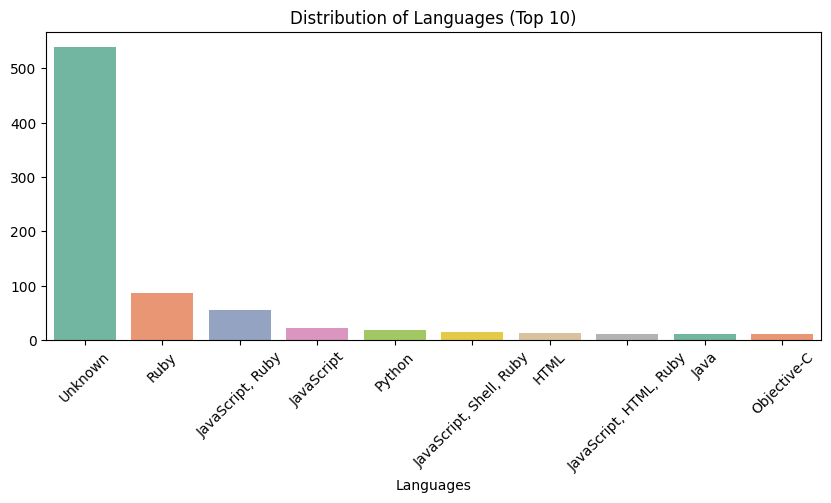

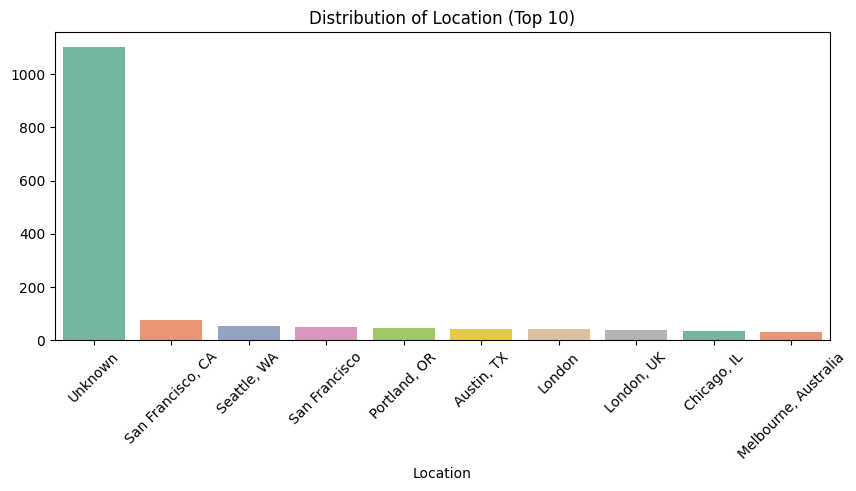

In [54]:
categorical_cols = ['Languages', 'Location']
for col in categorical_cols:
    plt.figure(figsize=(10, 4))
    top_values = df[col].value_counts().head(10)
    sns.barplot(x=top_values.index, y=top_values.values, hue=top_values.index, palette="Set2", legend=False)
    plt.xticks(rotation=45)
    plt.title(f"Distribution of {col} (Top 10)")
    plt.show()


# -------------------
# 4️⃣ Bias & Fairness Check: Distribution of Numerical Features
To assess potential biases or unfair distributions in the dataset, we examined the spread of key numerical variables:

Followers: Indicates a user’s influence or popularity.
Public_Repos: Reflects a user's activity or contributions on GitHub.
We used box plots to visualize outliers and skewness in these distributions. A heavily skewed distribution may imply that only a few users dominate the dataset, which can bias the recommendation system.

Understanding these variations helps ensure that the model does not unfairly prioritize popular users and treats low-activity users equitably during partner recommendations.


# -------------------
# Checking class imbalance (for classification problems)

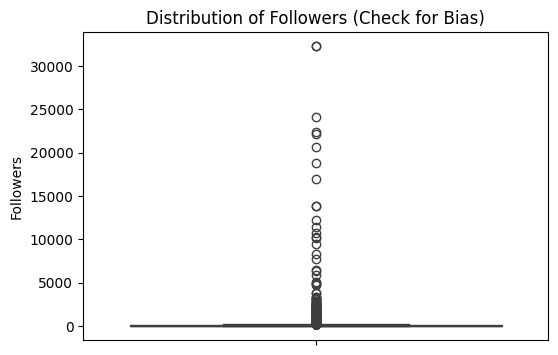

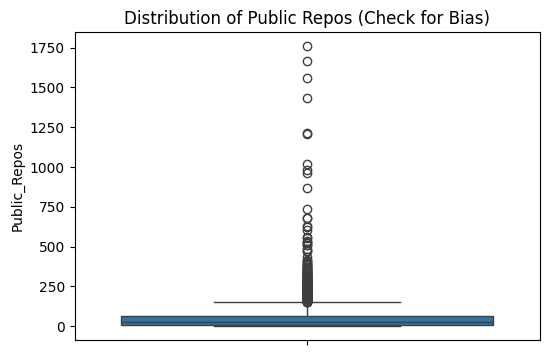

In [55]:
# Checking class imbalance with numerical columns
plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Followers"])
plt.title("Distribution of Followers (Check for Bias)")
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(y=df["Public_Repos"])
plt.title("Distribution of Public Repos (Check for Bias)")
plt.show()

# ----------------------------
# 5️⃣ 🔄 Encoding & Normalization
In this step, we prepare the dataset for machine learning algorithms by performing the following:

Categorical Encoding:

- Converted the Languages and Location columns into numeric format using Label Encoding, making them suitable for model input.
- Numerical Feature Normalization:

Applied MinMaxScaler to scale Public_Repos, Followers, and Following values to a range of 0 to 1.
- This ensures that features with larger numeric ranges don’t dominate others during model training.
- These preprocessing steps are crucial for ensuring consistent model performance across different input scales and types.
# ----------------------------


In [56]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Encoding categorical variables (Languages and Location)
encoder = LabelEncoder()
df['Languages_encoded'] = encoder.fit_transform(df['Languages'])
df['Location_encoded'] = encoder.fit_transform(df['Location'])

# Normalize numerical values
scaler = MinMaxScaler()
df[['Public_Repos', 'Followers', 'Following']] = scaler.fit_transform(df[['Public_Repos', 'Followers', 'Following']])


print("\n✅ Categorical variables encoded, numerical values normalized, and Bio removed (Profile URL retained).")



✅ Categorical variables encoded, numerical values normalized, and Bio removed (Profile URL retained).


# ----------------------------
# 🔄 Save Cleaned Data
# ----------------------------


In [57]:
df.to_csv("cleaned_github_users.csv", index=False)
print("\n💾 Cleaned dataset saved as 'cleaned_github_users.csv'.")



💾 Cleaned dataset saved as 'cleaned_github_users.csv'.


## ✅ Summary & Findings
After conducting a comprehensive data quality assessment using the PreML Checklist, the following observations and actions were made:

🔍 Data Completeness
- Missing values in Bio, Languages, Repositories, Location, and Profile_URL were handled appropriately using imputation.
- Latitude and Longitude values were filled with 0 for unknown locations.
- Users with completely uninformative profiles (0 repos, 0 followers, unknown language/location, no bio) were removed to improve dataset relevance.
  
🌍 Representativeness
- The dataset contains users from diverse locations and technology backgrounds, though some popular languages (e.g., JavaScript, Python) dominate.
- The Languages and Location distributions were visualized to confirm subgroup representation.

⚖️ Bias & Fairness
- Class imbalance was checked using boxplots of Followers and Public_Repos.
- A small portion of users with extremely high values may impact model learning; however, no user was excluded for having high or low activity to preserve diversity.
  
🔐 Privacy Considerations
- All data was scraped from public GitHub profiles. No private or sensitive information was collected or stored.
- Only publicly available metadata (repos, languages, bios, location, etc.) is used in this project.
  
🏷️ Labeling Consistency
- Data was programmatically collected via GitHub API, ensuring consistency in feature labels.
- Categorical features (Languages, Location) were encoded systematically.
  
💡 Final Thoughts
- The cleaned and processed dataset is now ready for applying machine learning models such as:
  - Collaborative Filtering
  - Content-Based Filtering
  - (Optional) NLP-based matching using user bios for users with available data.
    
The dataset supports the goal of building a GitHub Project Partner Recommendation System and is flexible for further enhancements.

